In [1]:
#Q1 

P_P = 0.9  # Probability of passing the class
P_F = 1 - P_P  # Probability of failing the class
P_Q_given_P = 0.6  # Probability of answering quickly given passing
P_Q_given_F = 0.3  # Probability of answering quickly given failing

P_P_given_Q = (P_Q_given_P * P_P) / ((P_Q_given_P * P_P) + (P_Q_given_F * P_F))


print(f"Proportion of students who pass given they answer quickly: {P_P_given_Q:.3f}")


Proportion of students who pass given they answer quickly: 0.947


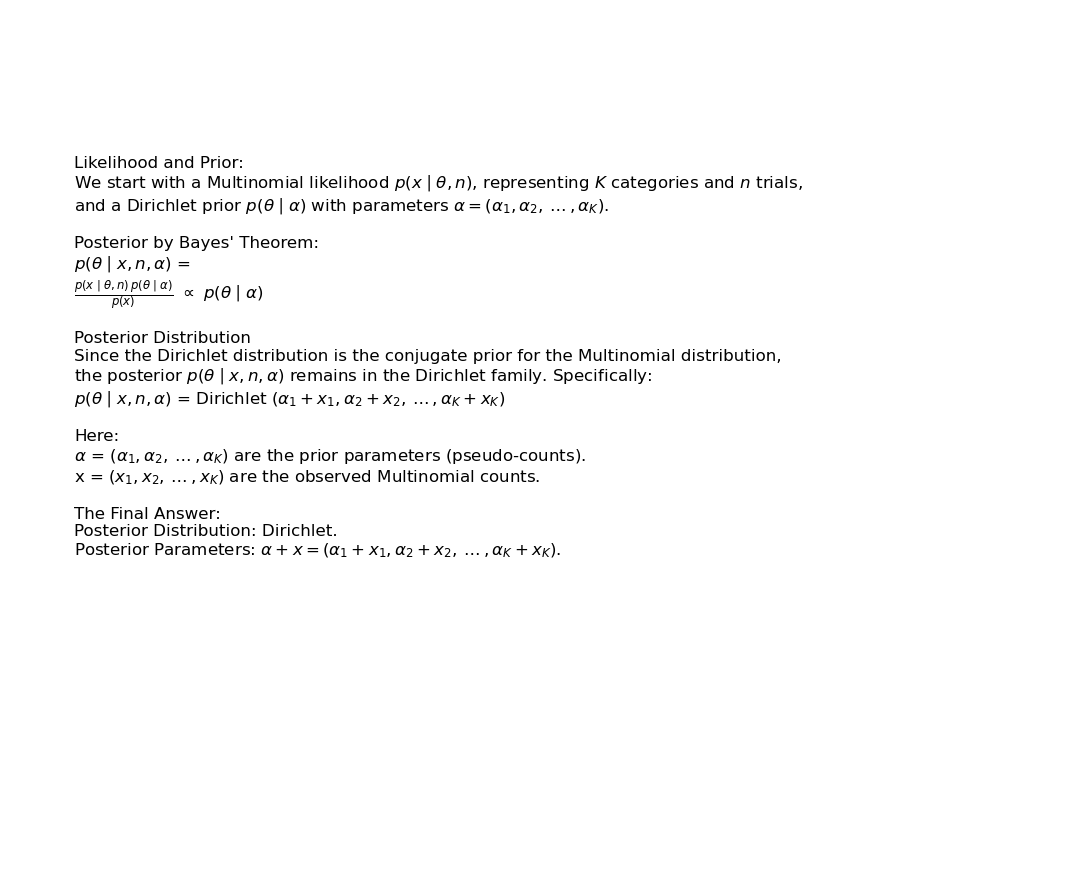

In [2]:
#Q2

import matplotlib.pyplot as plt

latex_text = r"""
Likelihood and Prior:
We start with a Multinomial likelihood $p(x \mid \theta, n)$, representing $K$ categories and $n$ trials, 
and a Dirichlet prior $p(\theta \mid \alpha)$ with parameters $\alpha = (\alpha_1, \alpha_2, \dots, \alpha_K)$. 

Posterior by Bayes' Theorem:
$p(\theta \mid x, n, \alpha)$ = 
$\frac{p(x \mid \theta, n) \, p(\theta \mid \alpha)}{p(x)}$ $\propto$ $p(\theta \mid \alpha)$

Posterior Distribution
Since the Dirichlet distribution is the conjugate prior for the Multinomial distribution, 
the posterior $p(\theta \mid x, n, \alpha)$ remains in the Dirichlet family. Specifically:
$p(\theta \mid x, n, \alpha)$ = Dirichlet $(\alpha_1 + x_1, \alpha_2 + x_2, \dots, \alpha_K + x_K)$

Here:
$\alpha$ = $(\alpha_1, \alpha_2, \dots, \alpha_K)$ are the prior parameters (pseudo-counts).
x = $(x_1, x_2, \dots, x_K)$ are the observed Multinomial counts.

The Final Answer:
Posterior Distribution: Dirichlet.
Posterior Parameters: $\alpha + x = (\alpha_1 + x_1, \alpha_2 + x_2, \dots, \alpha_K + x_K)$.
"""

plt.figure(figsize=(11, 9))
plt.text(0.06, 0.6, latex_text, fontsize=12, ha='left', va='center', wrap=True)
plt.axis('off')  
plt.tight_layout()
plt.show()

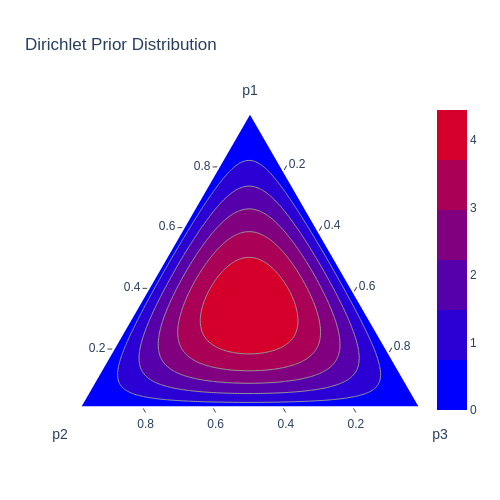

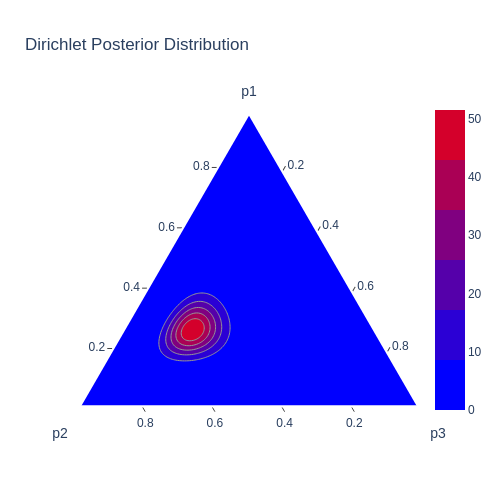

In [3]:
#Q3

import numpy as np
from scipy.stats import multinomial, dirichlet
import plotly.figure_factory as ff

# Multinomial distribution
categories = 3
n_trials = 50
true_probs = np.array([0.3, 0.5, 0.2])  # True probabilities for the categories
multinomial_dist = multinomial(n=n_trials, p=true_probs)
  
sample = multinomial_dist.rvs(size=1)[0]

# Dirichlet prior
alpha_prior = np.array([2, 2, 2])  # Prior alpha values
dirichlet_prior = dirichlet(alpha=alpha_prior)

p1 = np.linspace(0, 1, 100)
p2 = 1 - p1.copy()
p_ = np.linspace(0, 1, 100)
p1 = (p1[np.newaxis, :] * p_[:, np.newaxis]).flatten()
p2 = (p2[np.newaxis, :] * p_[:, np.newaxis]).flatten()
p3 = 1 - p1 - p2

valid = (p3 >= 0) & (p3 <= 1)
p1, p2, p3 = p1[valid], p2[valid], p3[valid]
p = np.c_[p1, p2, p3]

dirichlet_prior_densities = dirichlet_prior.pdf(p.T)

fig_prior = ff.create_ternary_contour(
    p.T, 
    dirichlet_prior_densities,
    pole_labels=['p1', 'p2', 'p3'],
    interp_mode='cartesian',
    showscale=True
)
fig_prior.update_layout(title="Dirichlet Prior Distribution")

fig_prior.show("png")

# Dirichlet posterior
alpha_posterior = alpha_prior + sample
dirichlet_posterior = dirichlet(alpha=alpha_posterior)

dirichlet_posterior_densities = dirichlet_posterior.pdf(p.T)

fig_posterior = ff.create_ternary_contour(
    p.T, 
    dirichlet_posterior_densities,
    pole_labels=['p1', 'p2', 'p3'],
    interp_mode='cartesian',
    showscale=True
)
fig_posterior.update_layout(title="Dirichlet Posterior Distribution")

fig_posterior.show("png")
